#### Summery of Dataset:
    This dataset contains information on San Francisco International Airport Report on Monthly Passenger Traffic Statistics by Airline.

SFO is one of the busiest airports in the United States and also an important transpacific gateway for international passenger / cargo travel. It would be interesting to use the data for the following:
1. Study the passenger travel patterns during COVID-19 pandemic.
2. Perform traffic forecasting using time series.

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing dataset
data=pd.read_csv("Air_Traffic_Passenger_Statistics.csv")
data

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090
...,...,...,...,...,...,...,...,...,...,...,...,...
46665,202106,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,International,G,2198
46666,202106,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,Terminal 3,E,419
46667,202106,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,Terminal 3,F,21468
46668,202106,United Airlines,UA,United Airlines,UA,International,Middle East,Deplaned,Other,International,G,4024


## Domain Analysis:
1. Activity Period: The is a numerical feature representing the time period during which the airline was active.
2. Operating Airline: This is a categorical feature representing the operating airline company. 
3. Operating Airline IATA Code: This is a categorical feature representing the IATA code of the Operating Airline.
4. Published Airline: This is a categorical feature reprsenting the publishing airline company.
5. Published Airline IATA Code: This is a categorical feature representing the IATA code of the published airline.
6. GEO Summery: This is a categorical feature representing the GEO location of the Airline Current activity.
7. GEO Region: This is a categorical feature representing the GEO locaton region of operation of the airline.
8. Activity Type Code: This is a categorical feature representing the Code of the specific Activity Type.
9. Price Category Code: This is a categorical feature representing the category of the pricing of that airline.
10. Terminal: This is a categorical feature representing the Flight Boaring terminial number.
11. Bording area:  This is a categorical feature representing the Flight bording area.
12. Passenger count: This is a categorical feature representing the Total passenger count for that particular flight. 

In [5]:
#Renaming Some column names:
data.rename({'Activity Period':'Activity_Period','Operating Airline':'Operating_Airline','Operating Airline IATA Code':'IATA_Code','Published Airline':'Published_Airline','Published Airline IATA Code':'Published_IATA','GEO Summary':'GEO_summary','GEO Region':'GEO_Region','Activity Type Code':'Activity_Code','Price Category Code':'Price_Category','Boarding Area':'Boarding_Area','Passenger Count':'Passenger_Count'},axis=1,inplace=True)


## Basic Checks:

In [6]:
data.head()

,Activity_Period,Operating_Airline,IATA_Code,Published_Airline,Published_IATA,GEO_summary,GEO_Region,Activity_Code,Price_Category,Terminal,Boarding_Area,Passenger_Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [7]:
data.tail()

,Activity_Period,Operating_Airline,IATA_Code,Published_Airline,Published_IATA,GEO_summary,GEO_Region,Activity_Code,Price_Category,Terminal,Boarding_Area,Passenger_Count
46665,202106,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,International,G,2198
46666,202106,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,Terminal 3,E,419
46667,202106,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,Terminal 3,F,21468
46668,202106,United Airlines,UA,United Airlines,UA,International,Middle East,Deplaned,Other,International,G,4024
46669,202106,United Airlines,UA,United Airlines,UA,International,Middle East,Enplaned,Other,International,G,5238


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46670 entries, 0 to 46669
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Activity_Period    46670 non-null  int64 
 1   Operating_Airline  46670 non-null  object
 2   IATA_Code          46519 non-null  object
 3   Published_Airline  46670 non-null  object
 4   Published_IATA     46519 non-null  object
 5   GEO_summary        46670 non-null  object
 6   GEO_Region         46670 non-null  object
 7   Activity_Code      46670 non-null  object
 8   Price_Category     46670 non-null  object
 9   Terminal           46670 non-null  object
 10  Boarding_Area      46670 non-null  object
 11  Passenger_Count    46670 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 4.3+ MB


In [9]:
data.describe()

,Activity_Period,Passenger_Count
count,46670.000000,46670.000000
mean,201323.079001,28852.816670
std,457.918639,60750.777914
min,200507.000000,1.000000
25%,200908.000000,4796.000000
50%,201311.000000,8796.000000
75%,201709.000000,19754.750000
max,202106.000000,659837.000000


In [10]:
data.describe(include='O')

,Operating_Airline,IATA_Code,Published_Airline,Published_IATA,GEO_summary,GEO_Region,Activity_Code,Price_Category,Terminal,Boarding_Area
count,46670,46519,46670,46519,46670,46670,46670,46670,46670,46670
unique,95,88,85,79,2,9,3,2,5,8
top,United Airlines,UA,United Airlines,UA,International,US,Enplaned,Other,International,A
freq,4983,9291,5969,11259,30028,16642,22252,41216,30212,16358


### We convert the Activity_Period to datatime

In [11]:
data.loc[:,'Activity_Period']=pd.to_datetime(data.loc[:,'Activity_Period'].astype(str),format="%Y%m")
data.loc[:,'Year']=data['Activity_Period'].dt.year
data.loc[:,'Month']=data['Activity_Period'].dt.month

In [12]:
data.head()

,Activity_Period,Operating_Airline,IATA_Code,Published_Airline,Published_IATA,GEO_summary,GEO_Region,Activity_Code,Price_Category,Terminal,Boarding_Area,Passenger_Count,Year,Month
0,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7
1,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7
2,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,7
3,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,7
4,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,7


In [13]:
data.columns

Index(['Activity_Period', 'Operating_Airline', 'IATA_Code',
       'Published_Airline', 'Published_IATA', 'GEO_summary', 'GEO_Region',
       'Activity_Code', 'Price_Category', 'Terminal', 'Boarding_Area',
       'Passenger_Count', 'Year', 'Month'],
      dtype='object')

In [14]:
for i in data.columns:
    print(data[i].unique())


['2005-07-01T00:00:00.000000000' '2005-08-01T00:00:00.000000000'
 '2005-09-01T00:00:00.000000000' '2005-10-01T00:00:00.000000000'
 '2005-11-01T00:00:00.000000000' '2005-12-01T00:00:00.000000000'
 '2006-01-01T00:00:00.000000000' '2006-02-01T00:00:00.000000000'
 '2006-03-01T00:00:00.000000000' '2006-04-01T00:00:00.000000000'
 '2006-05-01T00:00:00.000000000' '2006-06-01T00:00:00.000000000'
 '2006-07-01T00:00:00.000000000' '2006-08-01T00:00:00.000000000'
 '2006-09-01T00:00:00.000000000' '2006-10-01T00:00:00.000000000'
 '2006-11-01T00:00:00.000000000' '2006-12-01T00:00:00.000000000'
 '2007-01-01T00:00:00.000000000' '2007-02-01T00:00:00.000000000'
 '2007-03-01T00:00:00.000000000' '2007-04-01T00:00:00.000000000'
 '2007-05-01T00:00:00.000000000' '2007-06-01T00:00:00.000000000'
 '2007-07-01T00:00:00.000000000' '2007-08-01T00:00:00.000000000'
 '2007-09-01T00:00:00.000000000' '2007-10-01T00:00:00.000000000'
 '2007-11-01T00:00:00.000000000' '2007-12-01T00:00:00.000000000'
 '2008-01-01T00:00:00.000

In [15]:
for i in data.columns:
    print(data[i].value_counts())

2018-06-01    340
2019-06-01    336
2018-05-01    330
2019-07-01    330
2018-07-01    324
             ... 
2020-06-01    124
2021-06-01    110
2021-05-01    103
2021-04-01    101
2020-05-01    100
Name: Activity_Period, Length: 192, dtype: int64
United Airlines                     4983
United Airlines - Pre 07/01/2013    4308
SkyWest Airlines                    3034
Alaska Airlines                     2058
Delta Air Lines                     1076
                                    ... 
Atlas Air, Inc                         4
Pacific Aviation                       4
Evergreen International Airlines       4
Xtra Airways                           4
Boeing Company                         2
Name: Operating_Airline, Length: 95, dtype: int64
UA     9291
OO     3034
AS     2058
DL     1076
AA      990
       ... 
BBB      12
WO        6
5Y        4
EZ        4
XP        4
Name: IATA_Code, Length: 88, dtype: int64
United Airlines                     5969
United Airlines - Pre 07/01/2013    5

In [16]:
data.describe()

,Passenger_Count,Year,Month
count,46670.000000,46670.000000,46670.000000
mean,28852.816670,2013.165417,6.537326
std,60750.777914,4.582066,3.447107
min,1.000000,2005.000000,1.000000
25%,4796.000000,2009.000000,4.000000
50%,8796.000000,2013.000000,7.000000
75%,19754.750000,2017.000000,10.000000
max,659837.000000,2021.000000,12.000000


## EDA

In [ ]:
import sweetviz as sv 
myreport=sv.analyze(data)
myreport.show_html()  

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
data.describe(include='O')

,Operating_Airline,IATA_Code,Published_Airline,Published_IATA,GEO_summary,GEO_Region,Activity_Code,Price_Category,Terminal,Boarding_Area
count,46670,46519,46670,46519,46670,46670,46670,46670,46670,46670
unique,95,88,85,79,2,9,3,2,5,8
top,United Airlines,UA,United Airlines,UA,International,US,Enplaned,Other,International,A
freq,4983,9291,5969,11259,30028,16642,22252,41216,30212,16358


In [18]:
box=data.iloc[:,1:11]
box

,Operating_Airline,IATA_Code,Published_Airline,Published_IATA,GEO_summary,GEO_Region,Activity_Code,Price_Category,Terminal,Boarding_Area
0,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B
1,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B
2,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B
3,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B
4,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B
...,...,...,...,...,...,...,...,...,...,...
46665,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,International,G
46666,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,Terminal 3,E
46667,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,Terminal 3,F
46668,United Airlines,UA,United Airlines,UA,International,Middle East,Deplaned,Other,International,G


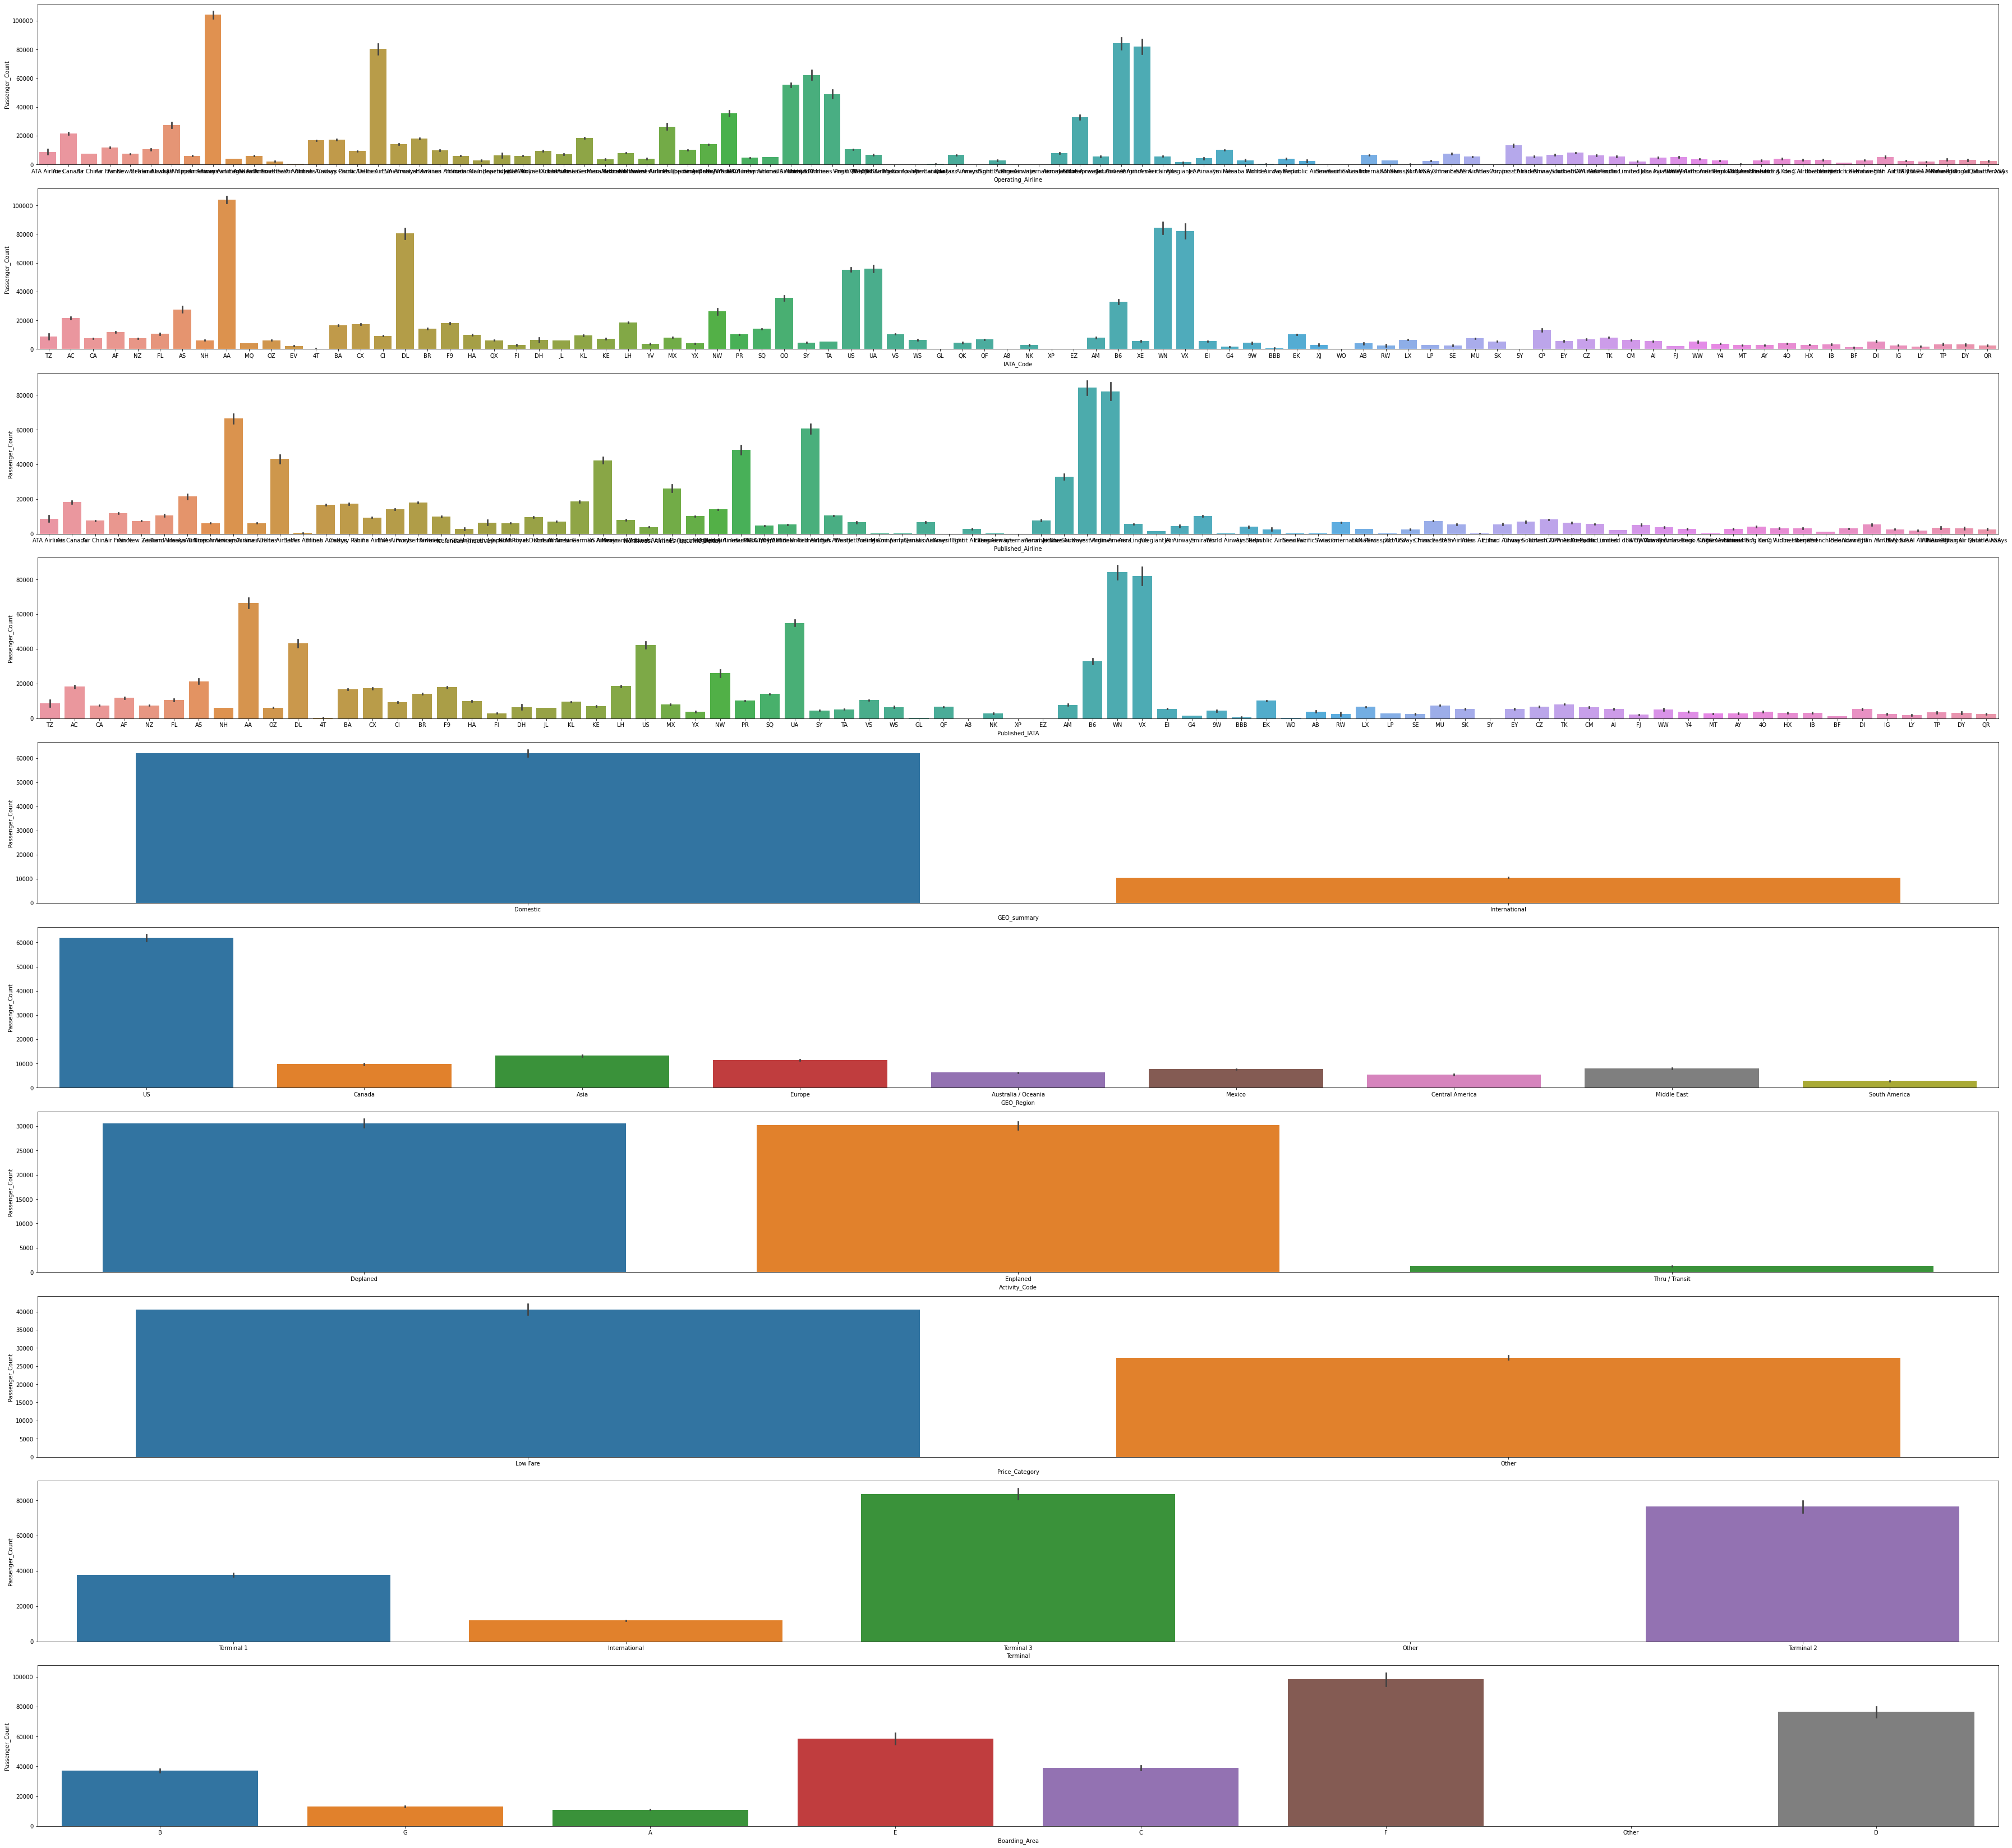

In [19]:
plt.figure(figsize=(50,50))
pltnum=1
for i in box.columns:
    plt.subplot(11,1,pltnum)
    sns.barplot(box[i],data.Passenger_Count)
    pltnum+=1
plt.tight_layout()
plt.show()

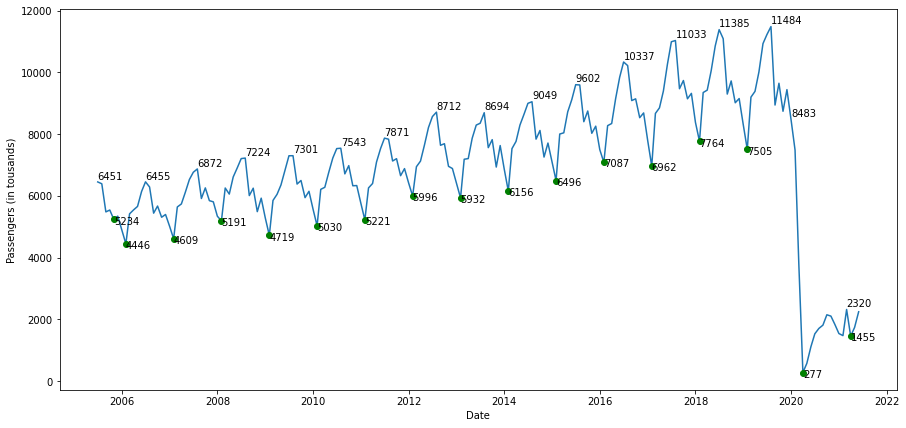

In [60]:
Passenger_yr = data.groupby(["Activity_Period"])["Passenger_Count"].sum().divide(1000)

fig, ax = plt.subplots(figsize=(15,7))

#Plotting the main PAX line
sns.lineplot(x=Passenger_yr.index, y=Passenger_yr.values, markers=True, ax=ax,zorder=0)
    
# Looking for maximum Passengers for each year
Passenger_max = Passenger_yr.groupby(Passenger_yr.index.year).max()
Passenger_max_complete = Passenger_yr[Passenger_yr.isin(Passenger_max.values)].to_frame()

for t,v in Passenger_max_complete.reset_index().values:
    ax.text(t,v+90,int(v))
    
# Looking for minimum PAX for each year
Passenger_yr_min = Passenger_yr.groupby(Passenger_yr.index.year).min()
Passenger_yr_min_complete = Passenger_yr[Passenger_yr.isin(Passenger_yr_min.values)].to_frame()
plt.scatter(Passenger_yr_min_complete.index, Passenger_yr_min_complete.values, color = "green", zorder=2)

for t,v in Passenger_yr_min_complete.reset_index().values:
    ax.text(t,v-150,int(v))
plt.xlabel("Date")
plt.ylabel("Passengers (in tousands)")
plt.show()


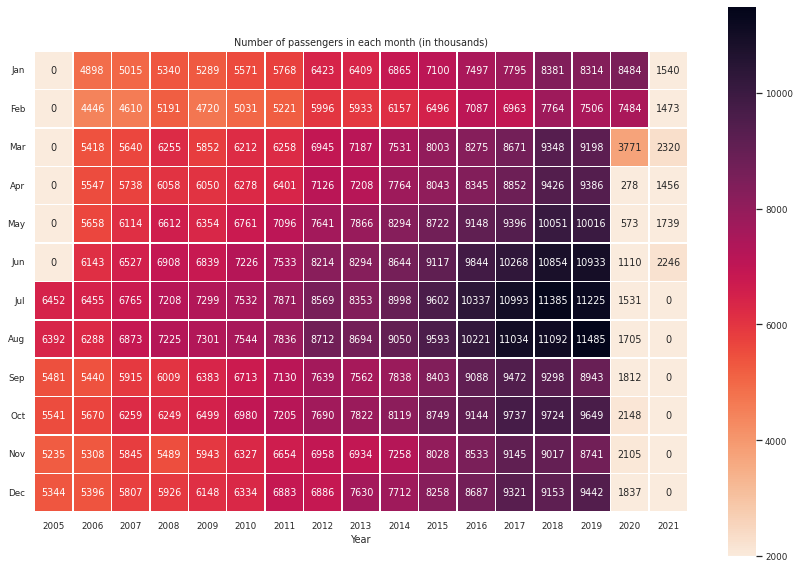

In [61]:
Passenger_month_yr = data.groupby(["Year","Month"])["Passenger_Count"].sum().divide(1000).round()
Passenger_month_yr = Passenger_month_yr.reset_index()

pivot_2 = Passenger_month_yr.pivot_table(values="Passenger_Count",index="Month",columns="Year", fill_value=0)
pivot_2.index=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

sns.set(font_scale=0.8)
fig = plt.figure(figsize=(12,8))
g = sns.heatmap(pivot_2, annot=True, linewidths=.5, fmt="d", square =True, vmin=2000, cmap=sns.cm.rocket_r)
g.set_title("Number of passengers in each month (in thousands)")
g.set_yticklabels(g.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
Passengers traffic steadily grows from 2005 through 2019 and then there was sudden drop in passengers due to COVID-19 during 2019 and 2021.
The highest number of passengers is reported so far is in August 2019: 11485000 people.
There is a visible peak in the traffic during the holiday period
Most of the flights are domestic
Most of the flights are operated by narrow body aircraft (e.g. Boeing 737, Airbus 320)
The biggest share in a traffic generation has the United Airlines (over 57%)

## Data Preprocessing

### Handling Null values:

In [20]:
data.isnull().sum()

Activity_Period        0
Operating_Airline      0
IATA_Code            151
Published_Airline      0
Published_IATA       151
GEO_summary            0
GEO_Region             0
Activity_Code          0
Price_Category         0
Terminal               0
Boarding_Area          0
Passenger_Count        0
Year                   0
Month                  0
dtype: int64

#### IATA_Code and Published_IATA contain some null values.

In [21]:
data.loc[data['IATA_Code'].isnull()==True]

,Activity_Period,Operating_Airline,IATA_Code,Published_Airline,Published_IATA,GEO_summary,GEO_Region,Activity_Code,Price_Category,Terminal,Boarding_Area,Passenger_Count,Year,Month
148,2005-08-01,Boeing Company,NaN,Boeing Company,NaN,Domestic,US,Deplaned,Other,Other,Other,18,2005,8
6809,2010-05-01,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,73,2010,5
6810,2010-05-01,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,73,2010,5
6920,2010-06-01,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Deplaned,Other,International,A,160,2010,6
6921,2010-06-01,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Enplaned,Other,International,A,160,2010,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45823,2020-10-01,Swissport USA,NaN,Swissport USA,NaN,Domestic,US,Enplaned,Other,International,A,30,2020,10
45920,2020-11-01,Swissport USA,NaN,Swissport USA,NaN,Domestic,US,Enplaned,Other,International,G,31,2020,11
46430,2021-04-01,Swissport USA,NaN,Swissport USA,NaN,Domestic,US,Enplaned,Other,International,A,31,2021,4
46534,2021-05-01,Swissport USA,NaN,Swissport USA,NaN,Domestic,US,Deplaned,Other,International,A,93,2021,5


In [22]:
data.IATA_Code.fillna(method='ffill',inplace=True)

In [23]:
data.Published_IATA.fillna(method='ffill',inplace=True)

In [24]:
data.isnull().sum()

Activity_Period      0
Operating_Airline    0
IATA_Code            0
Published_Airline    0
Published_IATA       0
GEO_summary          0
GEO_Region           0
Activity_Code        0
Price_Category       0
Terminal             0
Boarding_Area        0
Passenger_Count      0
Year                 0
Month                0
dtype: int64

#### All the Null values have been cleared.

### Handling outliers

In [ ]:
data.describe()

,Passenger_Count,Year,Month
count,46670.000000,46670.000000,46670.000000
mean,28852.816670,2013.165417,6.537326
std,60750.777914,4.582066,3.447107
min,1.000000,2005.000000,1.000000
25%,4796.000000,2009.000000,4.000000
50%,8796.000000,2013.000000,7.000000
75%,19754.750000,2017.000000,10.000000
max,659837.000000,2021.000000,12.000000


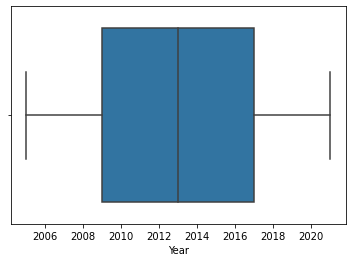

In [ ]:
sns.boxplot(data.Year)
plt.show()

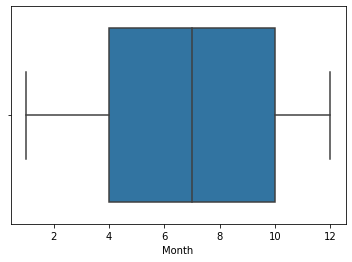

In [ ]:
sns.boxplot(data.Month)
plt.show()

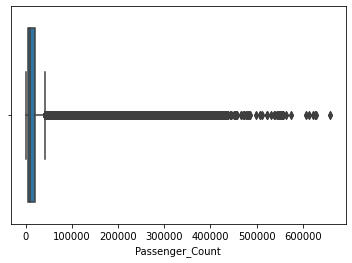

In [ ]:
sns.boxplot(data.Passenger_Count)
plt.show()

### Handling Categorical Features

In [25]:
data.describe(include='O')

,Operating_Airline,IATA_Code,Published_Airline,Published_IATA,GEO_summary,GEO_Region,Activity_Code,Price_Category,Terminal,Boarding_Area
count,46670,46670,46670,46670,46670,46670,46670,46670,46670,46670
unique,95,88,85,79,2,9,3,2,5,8
top,United Airlines,UA,United Airlines,UA,International,US,Enplaned,Other,International,A
freq,4983,9291,5969,11259,30028,16642,22252,41216,30212,16358


In [26]:
#Using Label Encoder to convert categorical to numerical 
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [27]:
box=data[['Operating_Airline','IATA_Code','Published_Airline','Published_IATA','GEO_summary','GEO_Region','Activity_Code','Price_Category','Terminal','Boarding_Area']]

In [28]:
for i in box.columns:
    data[i]=lb.fit_transform(box[i])


In [29]:
data

,Activity_Period,Operating_Airline,IATA_Code,Published_Airline,Published_IATA,GEO_summary,GEO_Region,Activity_Code,Price_Category,Terminal,Boarding_Area,Passenger_Count,Year,Month
0,2005-07-01,1,73,1,67,0,8,0,0,2,1,27271,2005,7
1,2005-07-01,1,73,1,67,0,8,1,0,2,1,29131,2005,7
2,2005-07-01,1,73,1,67,0,8,2,0,2,1,5415,2005,7
3,2005-07-01,5,7,5,7,1,2,0,1,2,1,35156,2005,7
4,2005-07-01,5,7,5,7,1,2,1,1,2,1,34090,2005,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46665,2021-06-01,85,74,75,68,1,5,1,1,0,6,2198,2021,6
46666,2021-06-01,85,74,75,68,1,5,1,1,4,4,419,2021,6
46667,2021-06-01,85,74,75,68,1,5,1,1,4,5,21468,2021,6
46668,2021-06-01,85,74,75,68,1,6,0,1,0,6,4024,2021,6


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46670 entries, 0 to 46669
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Activity_Period    46670 non-null  datetime64[ns]
 1   Operating_Airline  46670 non-null  int64         
 2   IATA_Code          46670 non-null  int64         
 3   Published_Airline  46670 non-null  int64         
 4   Published_IATA     46670 non-null  int64         
 5   GEO_summary        46670 non-null  int64         
 6   GEO_Region         46670 non-null  int64         
 7   Activity_Code      46670 non-null  int64         
 8   Price_Category     46670 non-null  int64         
 9   Terminal           46670 non-null  int64         
 10  Boarding_Area      46670 non-null  int64         
 11  Passenger_Count    46670 non-null  int64         
 12  Year               46670 non-null  int64         
 13  Month              46670 non-null  int64         
dtypes: dat

## Feature Selection

### Heat map

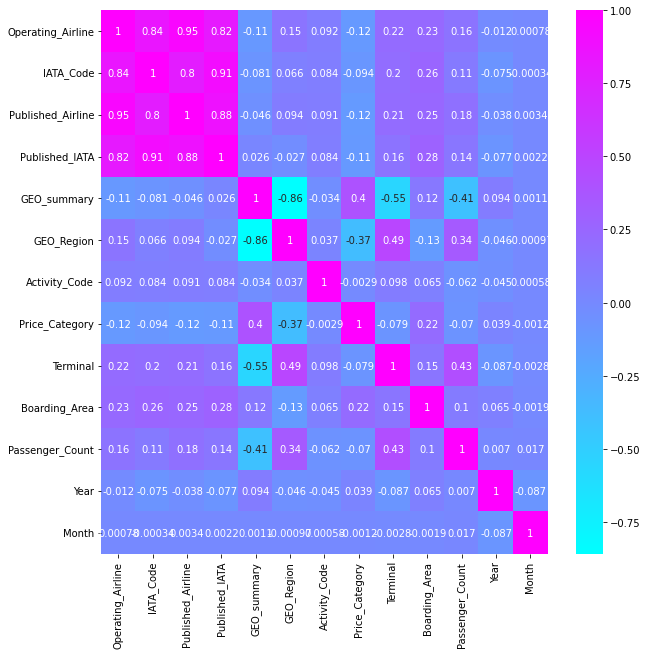

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='cool')
plt.show()

In [32]:
#Published_Airlines and Operating_Airlines are highly correlated so we drop one of them.
#IATA_code and Published_IATA are highly correlated so we drop one of them.
data.drop(['Published_Airline','Published_IATA'],axis=1,inplace=True)

In [33]:
data.set_index('Activity_Period',inplace=True)

In [34]:
data.head()

,Operating_Airline,IATA_Code,GEO_summary,GEO_Region,Activity_Code,Price_Category,Terminal,Boarding_Area,Passenger_Count,Year,Month
Activity_Period,,,,,,,,,,,
2005-07-01,1,73,0,8,0,0,2,1,27271,2005,7
2005-07-01,1,73,0,8,1,0,2,1,29131,2005,7
2005-07-01,1,73,0,8,2,0,2,1,5415,2005,7
2005-07-01,5,7,1,2,0,1,2,1,35156,2005,7
2005-07-01,5,7,1,2,1,1,2,1,34090,2005,7


In [35]:
data.describe()

,Operating_Airline,IATA_Code,GEO_summary,GEO_Region,Activity_Code,Price_Category,Terminal,Boarding_Area,Passenger_Count,Year,Month
count,46670.000000,46670.000000,46670.000000,46670.000000,46670.000000,46670.000000,46670.000000,46670.000000,46670.000000,46670.000000,46670.000000
mean,52.726634,48.362888,0.643411,4.334733,0.579301,0.883137,1.020420,2.799100,28852.816670,2013.165417,6.537326
std,29.032327,25.108019,0.478997,3.175770,0.588409,0.321261,1.491033,2.585073,60750.777914,4.582066,3.447107
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2005.000000,1.000000
25%,27.000000,22.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4796.000000,2009.000000,4.000000
50%,56.000000,57.000000,1.000000,4.000000,1.000000,1.000000,0.000000,2.000000,8796.000000,2013.000000,7.000000
75%,84.000000,74.000000,1.000000,8.000000,1.000000,1.000000,2.000000,6.000000,19754.750000,2017.000000,10.000000
max,94.000000,87.000000,1.000000,8.000000,2.000000,1.000000,4.000000,7.000000,659837.000000,2021.000000,12.000000


#### No Constant Columns Present

### Chechking for Stationary

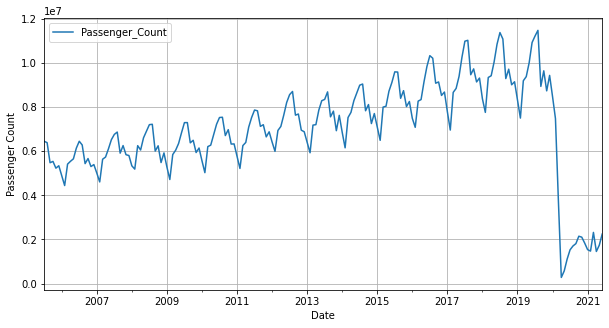

In [36]:
box = data.groupby("Activity_Period")["Passenger_Count"].sum().to_frame()
fig, ax = plt.subplots(1,1,figsize=(10,5))
box.plot(ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Passenger Count")
plt.grid()
plt.show()

In [37]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(box["Passenger_Count"],)
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])

ADF Statistic: -2.646293
p-value: 0.083802


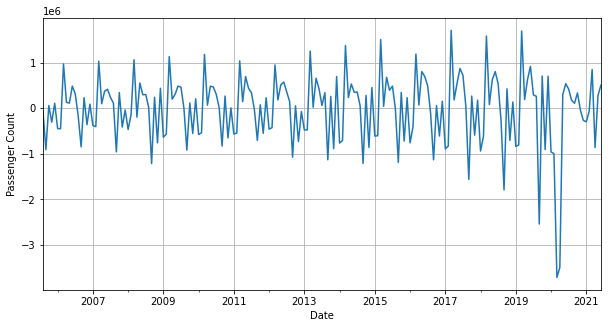

In [ ]:
box1 =box.diff(periods=1).dropna()
plt.figure(figsize=(10,5))
ax=box1['Passenger_Count'].plot()
ax.set_xlabel("Date")
ax.set_ylabel("Passenger Count")
plt.grid(True)
plt.show()

In [ ]:
results = adfuller(box1['Passenger_Count'])
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])

ADF Statistic: -3.664242
p-value: 0.004645


## ARIMA Model

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

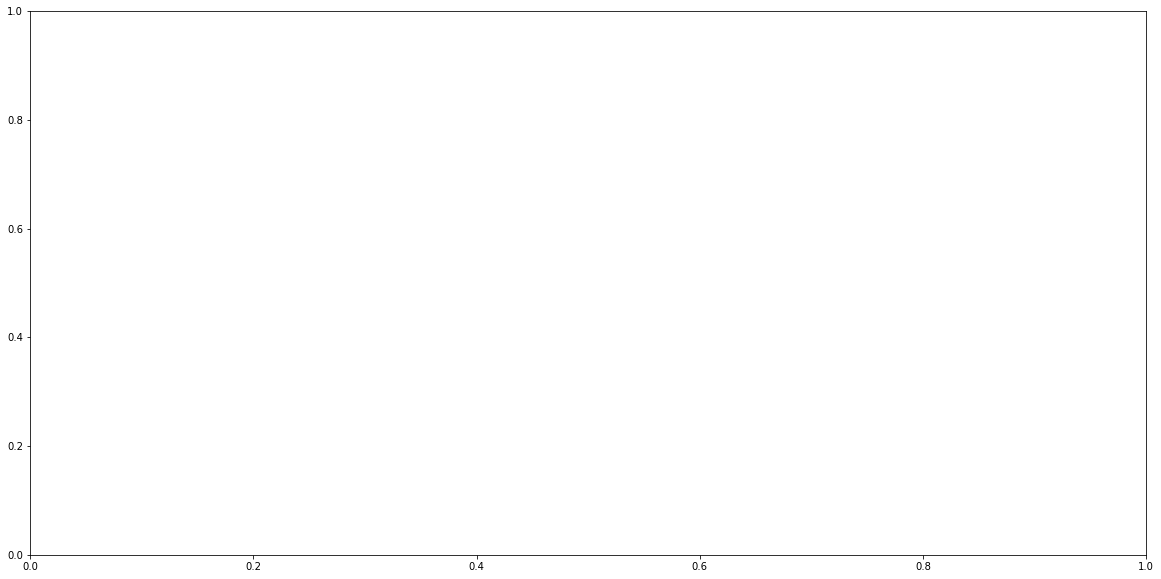

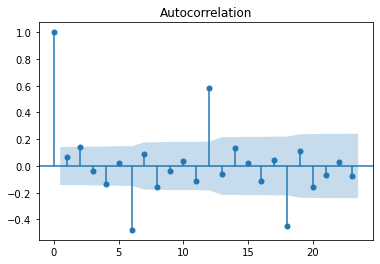

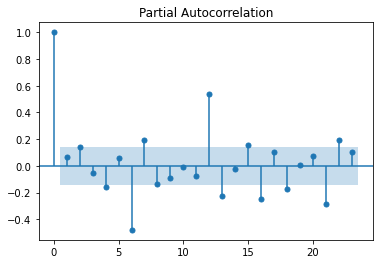

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(20,10))
plot_acf(box1)
plot_pacf(box1)
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
scores= pd.DataFrame(columns=["p","q","aic","bic"])
i=0
# Loop over p values from 0-5
for p in range(6):
    # Loop over q values from 0-5
    for q in range(6):
        try:
            # creating and fitting ARIMA(p,1,q) model
            model = ARIMA(box1, order=(p,1,q))
            results = model.fit()
            # Printing order, AIC and BIC
            scores.loc[i,"p"] = p
            scores.loc[i,"q"] = q
            scores.loc[i,"aic"] = results.aic
            scores.loc[i,"bic"] = results.bic
            i = i+1
        except:
            i = i+1
    
scores["Sum"] = scores["aic"]+scores["bic"]
scores.sort_values(by="Sum", ascending=False, inplace=True)
scores

c:\Users\HOME\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\HOME\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\HOME\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\HOME\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\HOME\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information 

,p,q,aic,bic,Sum
0,0,0,5808.726399,5815.220447,11623.946847
6,1,0,5744.496016,5754.237088,11498.733104
18,3,0,5737.49382,5753.72894,11491.22276
12,2,0,5737.506832,5750.494928,11488.00176
24,4,0,5723.975291,5743.457436,11467.432727
30,5,0,5717.091365,5739.820533,11456.911898
25,4,1,5704.678527,5727.407696,11432.086223
31,5,1,5702.07787,5728.054062,11430.131932
9,1,3,5699.623808,5719.105952,11418.72976
14,2,2,5699.617542,5719.099686,11418.717228


**So p and q values 3 and 5 seems to give the least AIC and BIC scores**

### Final Model

In [ ]:
model_final= ARIMA(box1,order=(3,1,5))
results = model_final.fit()

c:\Users\HOME\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\Users\HOME\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [ ]:
forecast = results.forecast(steps=10)[0]

In [ ]:
forecast

array([ 219991.42539614,  -83153.43069534, -253886.32970588,
        115897.2320094 , -349111.41739629,   81668.76584513,
       -204168.28022274, -136439.16725459,   20869.03418696,
       -314109.11270107])

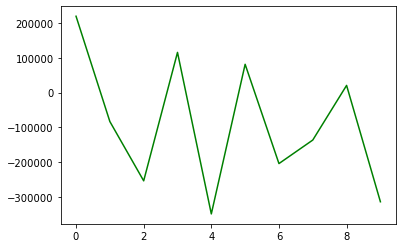

In [ ]:
plt.plot(forecast,color='green')
plt.show()

## SARIMAX Model

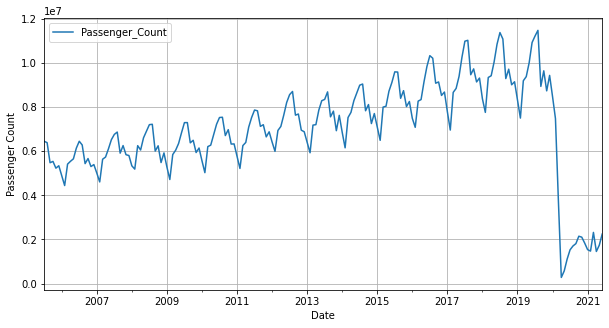

In [38]:
box = data.groupby("Activity_Period")["Passenger_Count"].sum().to_frame()
fig, ax = plt.subplots(1,1,figsize=(10,5))
box.plot(ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Passenger Count")
plt.grid()
plt.show()

#### We divide the time series into trend, seasonality and residuals

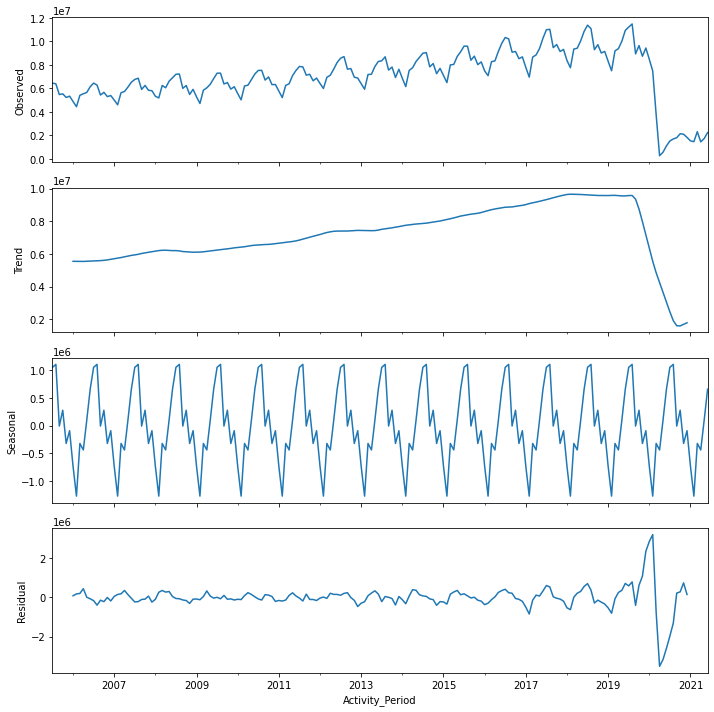

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize']=10,10
decomp= seasonal_decompose(box, model="additive")
add = decomp.plot()
plt.show()

In [ ]:
The model seems to have a 12-month seasonal trend which makes sense as usually every year a holiday period is more busy at airports. 

The Augmented Dickey-Fuller test can be used to test for stationarity of our time series. 
* Null Hypothesis (H0): if failed to be rejected (high p-value) means it is non-stationary
* Null Hypothesis (H1): if H0 is rejected (low p-value) means it is stationary

In [40]:
results = adfuller(box['Passenger_Count'])
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])

ADF Statistic: -2.646293
p-value: 0.083802


P-value is 0.083 so that means Accept H0 i.e time series is not stationary.

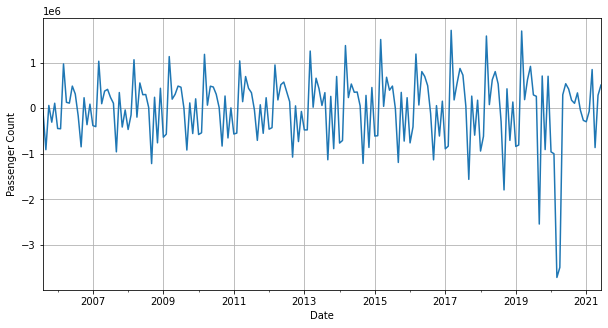

In [41]:
box1 =box.diff().dropna()
plt.figure(figsize=(10,5))
ax=box1['Passenger_Count'].plot()
ax.set_xlabel("Date")
ax.set_ylabel("Passenger Count")
plt.grid(True)
plt.show()

In [42]:
results = adfuller(box1['Passenger_Count'])
print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])

ADF Statistic: -3.664242
p-value: 0.004645


p-value is small enough so we reject the null hypothesis for now even though if we look closely the time series still does look a bit non-stationary.

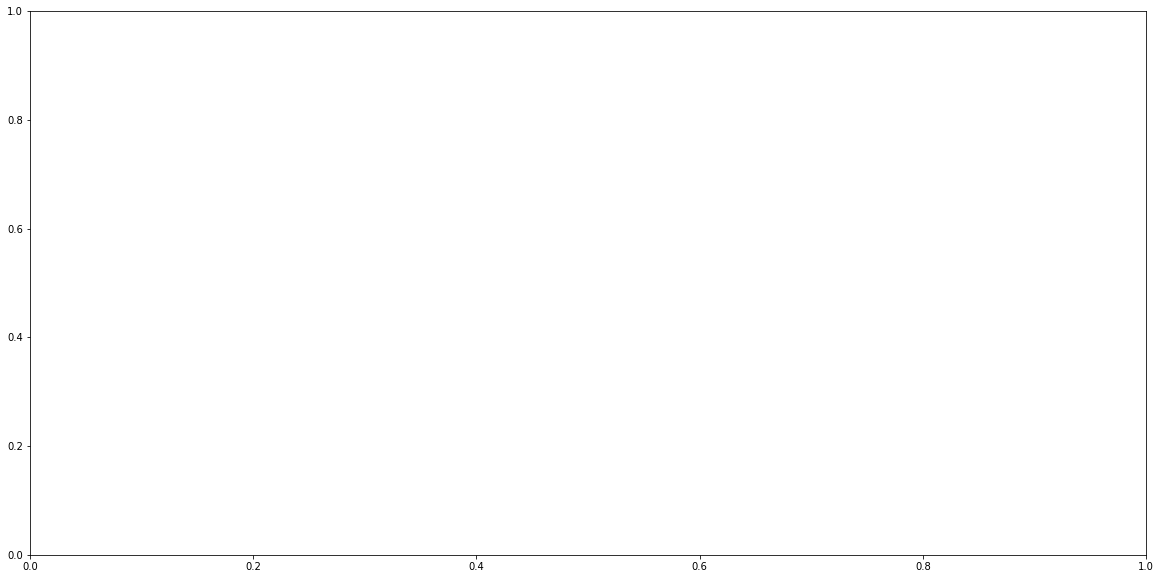

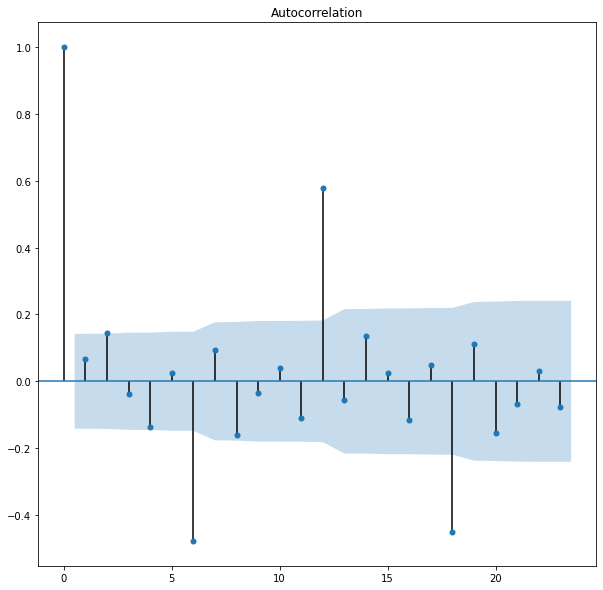

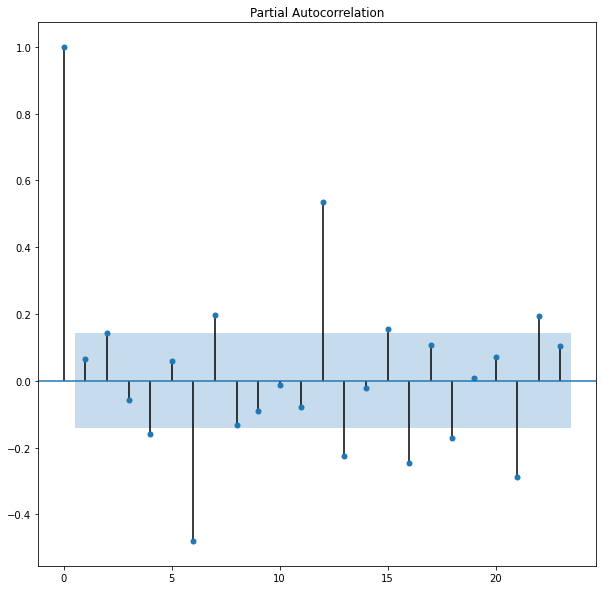

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig,ax = plt.subplots(1,1,figsize=(20,10))
plot_acf(box1)
plot_pacf(box1)
plt.show()

In [ ]:
%pip install -U statsmodels

  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Note: you may need to restart the kernel to use updated packages.


In [50]:
from statsmodels.tsa.arima_model import ARIMA
scores= pd.DataFrame(columns=["p","q","aic","bic"])
i=0
# Loop over p values from 0-5
for p in range(4):
    # Loop over q values from 0-5
    for q in range(4):
        try:
            # creating and fitting ARIMA(p,1,q) model
            model = ARIMA(box1.astype(float), order=(p,1,q))
            results = model.fit()
            # Printing order, AIC and BIC
            scores.loc[i,"p"] = p
            scores.loc[i,"q"] = q
            scores.loc[i,"aic"] = results.aic
            scores.loc[i,"bic"] = results.bic
            i = i+1
        except:
            i = i+1
    
scores["Sum"] = scores["aic"]+scores["bic"]
scores.sort_values(by="Sum", ascending=False, inplace=True)
scores

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


,p,q,aic,bic,Sum
0,0,0,5808.726399,5815.220447,11623.946847
4,1,0,5744.496016,5754.237088,11498.733104
12,3,0,5737.49382,5753.72894,11491.22276
8,2,0,5737.506832,5750.494928,11488.00176
7,1,3,5699.619742,5719.101886,11418.721628
10,2,2,5699.617262,5719.099407,11418.716669
13,3,1,5697.302539,5716.784684,11414.087223
6,1,2,5697.623773,5713.858893,11411.482666
2,0,2,5697.958762,5710.946858,11408.90562
5,1,1,5697.769121,5710.757217,11408.526338


In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

box1.index.freq = box1.index.inferred_freq
model2 = SARIMAX(box1, order=(0,1,1), seasonal_order=(0,1,0,12))
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                    Passenger_Count   No. Observations:                  191
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 12)   Log Likelihood               -2650.014
Date:                            Mon, 06 Jun 2022   AIC                           5304.028
Time:                                    11:01:20   BIC                           5310.392
Sample:                                08-01-2005   HQIC                          5306.609
                                     - 06-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7610      0.023    -33.266      0.000      -0.806      -0.716
sigma2      5.407e+11   8.85e-15   6.11e+25      0.000    5.41e+11    5.41e+11
===================================================================================
Ljung-Box (Q):                       77.20   Jarque-Bera (JB):              5867.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              37.84   Skew:                            -0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

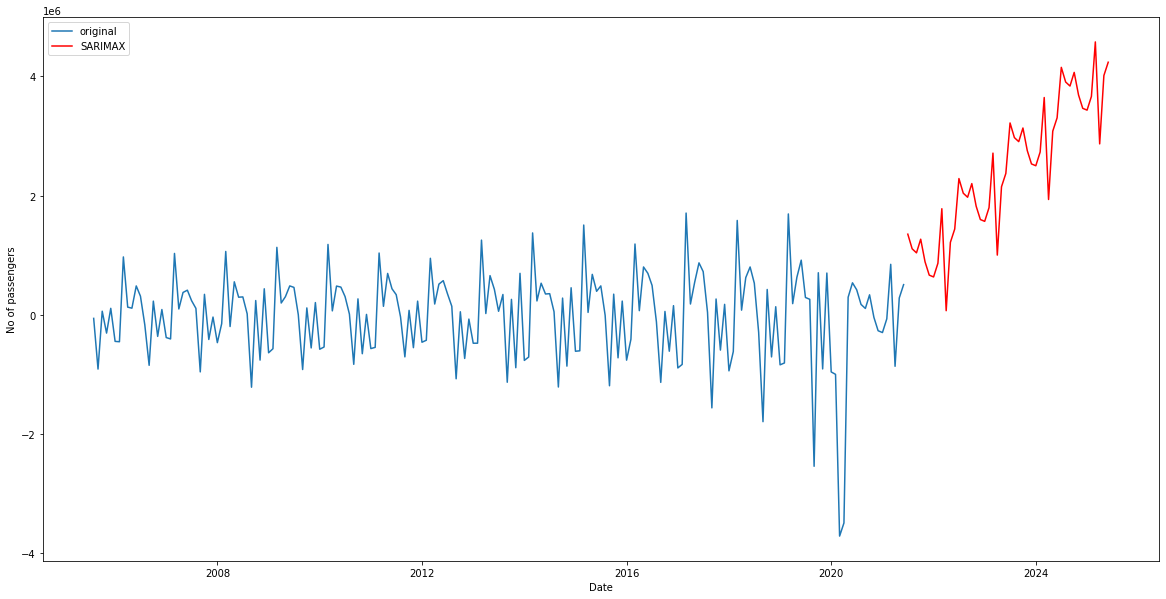

In [55]:
forecast = results.get_forecast(steps=48)
lower = forecast.conf_int()
upper = forecast.conf_int()

# Plot mean SARIMA predictions
fig,ax = plt.subplots(1,1,figsize=(20,10))

plt.plot(box1, label='original')
plt.plot(forecast.predicted_mean, label='SARIMAX', c="r")
plt.xlabel('Date')
plt.ylabel('No of passengers')
plt.legend()
plt.show()

In [62]:
###The plot above shows predictions using SARIMAX(2,1,1)x(0,1,0,12). According to this prediction in 2024 a number of passengers can reach 40 millions at the peak time and continue to rise.